<a href="https://colab.research.google.com/github/ritwikraha/AutoRegressive-Bhasha/blob/main/Gemini_First_Contact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.6/146.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 598.7/598.7 kB 24.5 MB/s eta 0:00:00


In [6]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [9]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GEMINI_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [10]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


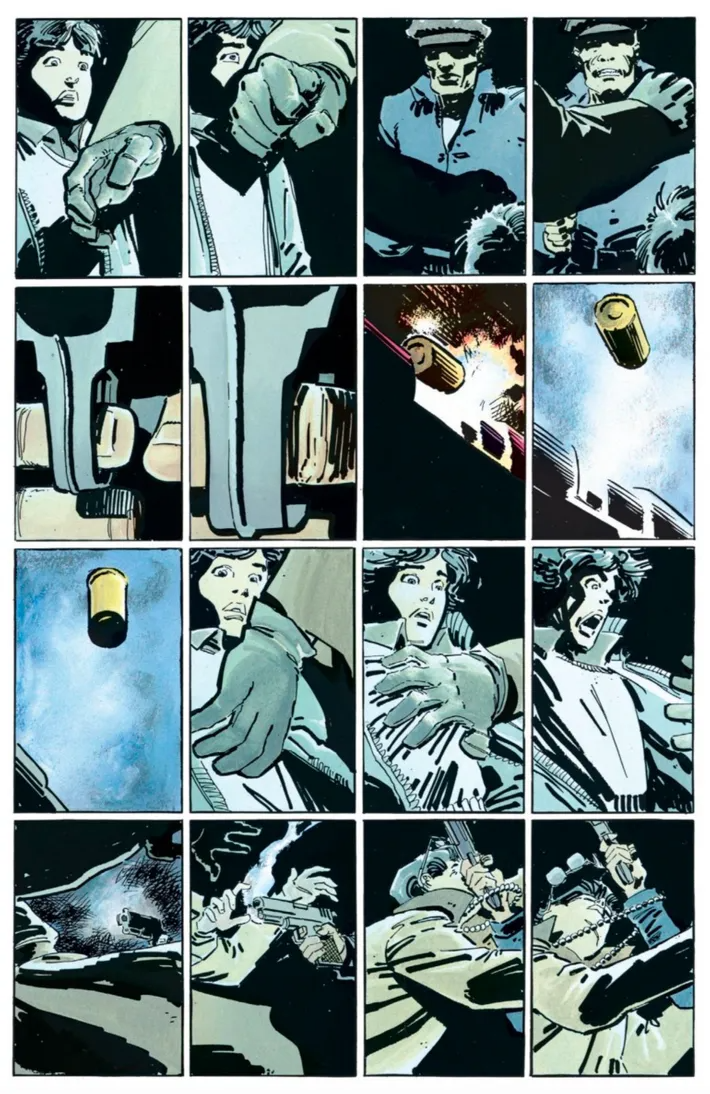

In [12]:
import PIL.Image

img = PIL.Image.open('batman.png')
img

In [13]:
model = genai.GenerativeModel('gemini-pro-vision')

In [14]:
response = model.generate_content(img)

to_markdown(response.text)

>  This is a sequence of panels from the comic book Batman: The Dark Knight Returns. In the sequence, Batman is shooting at a police officer. The first panel shows Batman pointing his gun at the officer. The second panel shows the officer shooting at Batman. The third panel shows Batman dodging the officer's bullets. The fourth panel shows Batman shooting the officer in the leg. The fifth panel shows the officer falling to the ground. The sixth panel shows Batman standing over the officer.

In [15]:
response = model.generate_content(["Write a series of panels following the image, make it dramatic", img], stream=True)
response.resolve()

In [16]:
to_markdown(response.text)

>  Panel 1: A man and a woman are standing in a dark alleyway. The man is holding a gun.
> Panel 2: The man points the gun at the woman.
> Panel 3: The woman screams.
> Panel 4: The man shoots the woman.
> Panel 5: